In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from collections import defaultdict
import scipy.stats as st
import pickle

import networkx as nx
# import gmatch4py as gm

import sys
sys.path.append("..\\Git\\complex_stylized_supply_chain_model_generator")

from complex_toy_model_graph_generator import ComplexSimModelGraph
from structure_model_composer.set_locations_of_structures import plot_graph_locations_with_pos


In [2]:
data={}
x={}
y={}

In [3]:
#Open data
with open(r"./ga_0/final_ga_0_all_seeds.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
for seed, dict_seed in data.items():
    for perc, res in dict_seed.items():
        method_name = perc.split("_")[0]
        try:
            percentage = x[method_name]
            performance = y[method_name]
        except KeyError:
            percentage = x[method_name] = []
            performance = y[method_name] = defaultdict(list)
        current_percentage = int(perc.split("_")[-1])
        percentage.append(current_percentage)
        performance[current_percentage].append(res["Quality_of_Fit"]["graph_edit_distance"])

# Convergence

Text(0, 0.5, ' # improvements ')

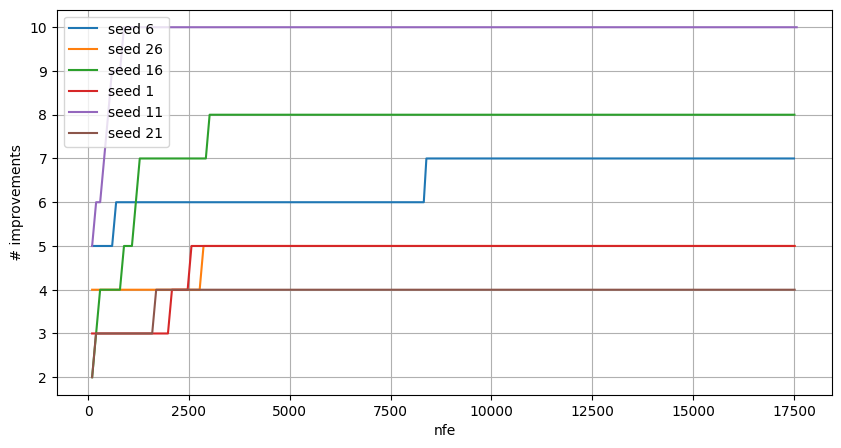

In [6]:
plt.figure(figsize=(10,5))
plt.grid()
for seed, ga in data.items():
    iterations = ga["ga_0"]["Convergence"]["nfe"]
    improvements = ga["ga_0"]["Convergence"]["eprogress"]
    plt.plot(iterations, improvements, label=f"seed {seed}")

plt.legend()
plt.xlabel("nfe")
plt.ylabel(" # improvements ")
#plt.ylim(-100, -50)

In [7]:
for k, v in data.items():
    print("seed", k, "ged", data[k]["ga_0"]["Quality_of_Fit"]["graph_edit_distance"], "res", data[k]["ga_0"]["Results"])

seed 6 ged 0.6716867469879518 res {0: {'graph_structure': 31299, 'min_distance': 1.7655825359235036}}
seed 26 ged 0.6796747967479675 res {0: {'graph_structure': 13871, 'min_distance': 2.158904466589812}}
seed 16 ged 0.676737160120846 res {0: {'graph_structure': 30712, 'min_distance': 1.6096287308403476}}
seed 1 ged 0.8431372549019608 res {0: {'graph_structure': 38054, 'min_distance': 0.986791230122063}}
seed 11 ged 0.7606177606177607 res {0: {'graph_structure': 27572, 'min_distance': 1.12910564653637}}
seed 21 ged 0.6256983240223464 res {0: {'graph_structure': 21845, 'min_distance': 1.492824755997497}}
